<a href="https://colab.research.google.com/github/vsbca/Data-Science/blob/master/Timeseries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series is a sequence of values ordered in time. We may encounter time series data in pretty much any domain. Weather forecasts, exchange rates, sales data, sound waves are just a few examples. Time series can be any type of data that is represented as an ordered sequence.<br/>
a univariate time series which means there is a single value at each time step. We also have multivariate time series that have multiple values at each time step. <br/><br/>
**Patterns in Time Series**<br/>
The time series in the figures we have seen so far follow a trend which means an overall direction upwards or downwards. This is just one of the patterns we can observe in time series.
Another common pattern is seasonality which indicates patterns that repeat observed or predictable intervals. For instance, sales data of retail stores usually show seasonality. The sales amount increases and decreases at certain times or special dates. Let’s see an example:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#ref:
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vsbca/Data-Science/master/Data/multiTimeline.csv")
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


#Rename the dataframe column names

In [4]:
df.columns = ["month", "diet", "gym", "finance"]
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [12]:
string_to_convert = '2020-02-01'
print ('Your string: {}'.format(string_to_convert))
print ('Your string_to_convert type: {}'.format(type(string_to_convert)))
print ("#########")

# Convert your string
new_date = pd.to_datetime(string_to_convert)

print ('Your new date is: {}'.format(new_date))
print ('Your new type is: {}'.format(type(new_date)))

Your string: 2020-02-01
Your string_to_convert type: <class 'str'>
#########
Your new date is: 2020-02-01 00:00:00
Your new type is: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [13]:
s = pd.Series(['2020-02-01',
               '2020-02-02',
               '2020-02-03',
               '2020-02-04'])
s

0    2020-02-01
1    2020-02-02
2    2020-02-03
3    2020-02-04
dtype: object

In [15]:
s = pd.to_datetime(s)
s

0   2020-02-01
1   2020-02-02
2   2020-02-03
3   2020-02-04
dtype: datetime64[ns]

use .to_datetime() to convert the 'month' column in your DataFrame to a DateTime.

In [5]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [6]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


You can use a built-in pandas visualization method .plot() to plot your data as 3 line plots on a single figure (one for each column, namely, 'diet', 'gym', and 'finance').<br/>

Note that you can also specify some arguments to this method, such as figsize, linewidthand fontsize to set the figure size, line width and font size of the plot, respectively.<br/>

Additionally, you'll see that what you see on the x-axis is not the months, as the default label suggests, but the years. To make your plot a bit more accurate, you'll specify the label on the x-axis to 'Year' and also set the font size to 20.<br/>

Text(0.5, 0, 'Year')

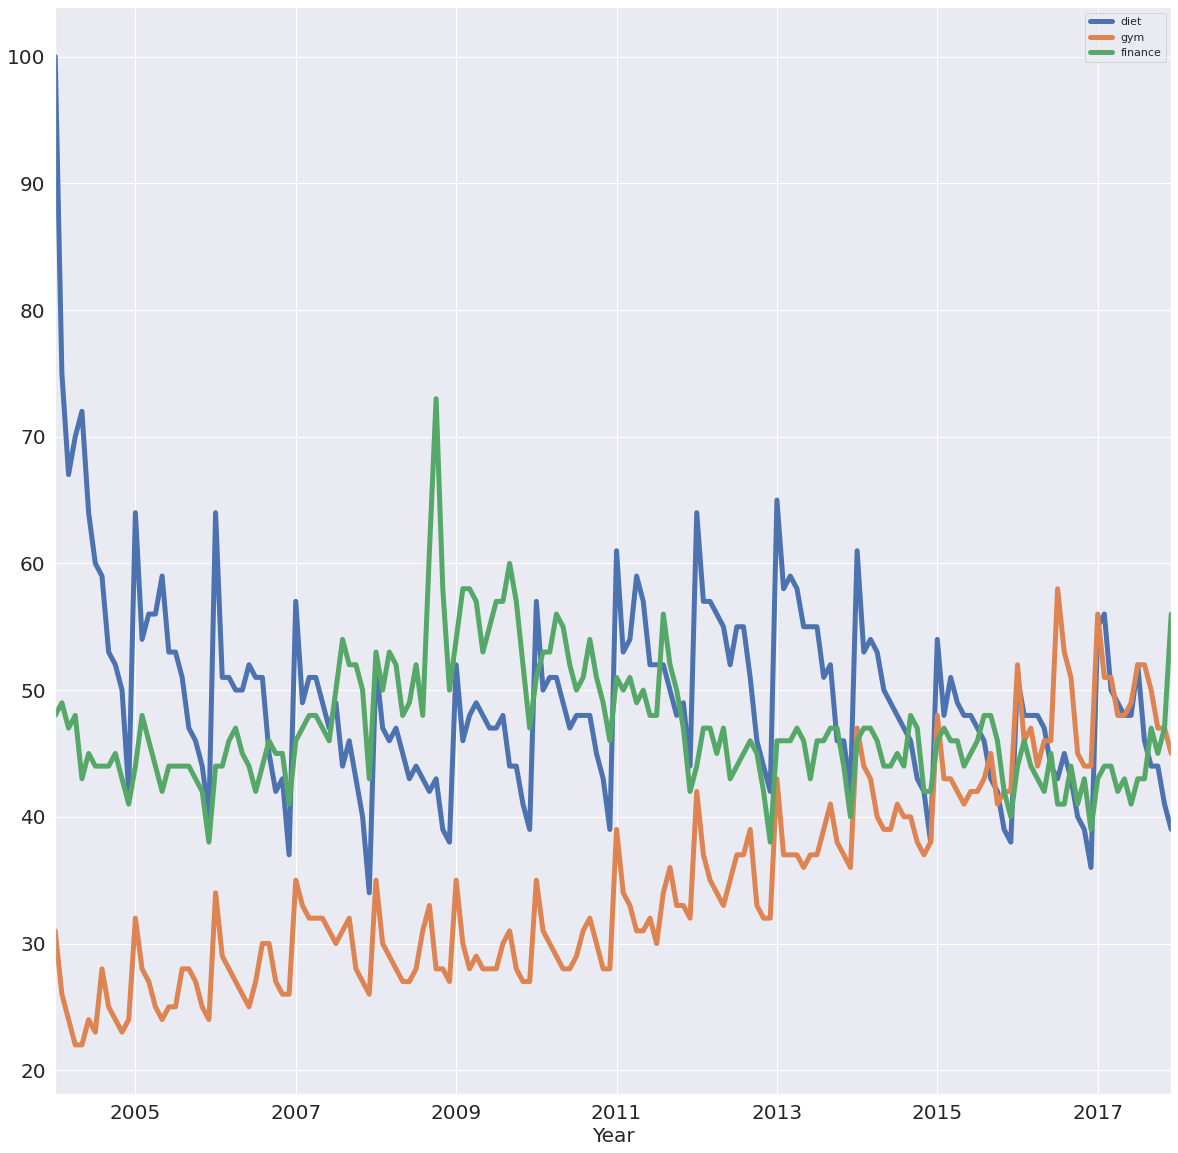

In [7]:
df.plot(figsize=(20,20), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

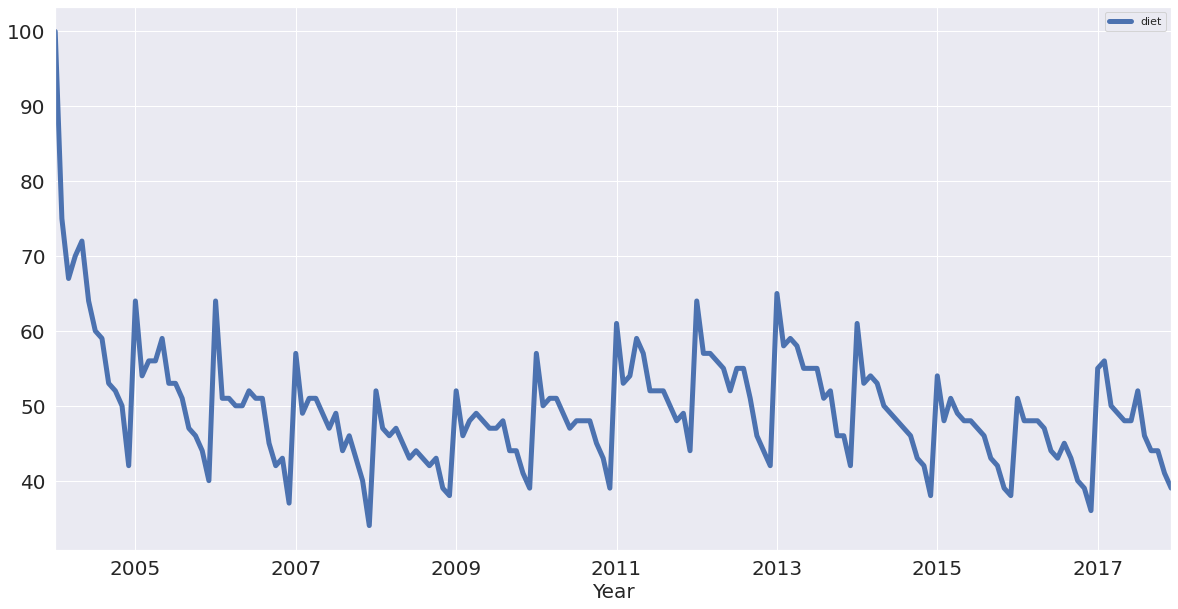

In [8]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# **Trends and Seasonality in Time Series Data**<br/>
**Identifying Trends in Time Series**<br/>
There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

What happens then because you take the average is it tends to smooth out noise and seasonality. You'll see an example of that right now. Check out this rolling average of 'diet' using the built-in pandas methods.

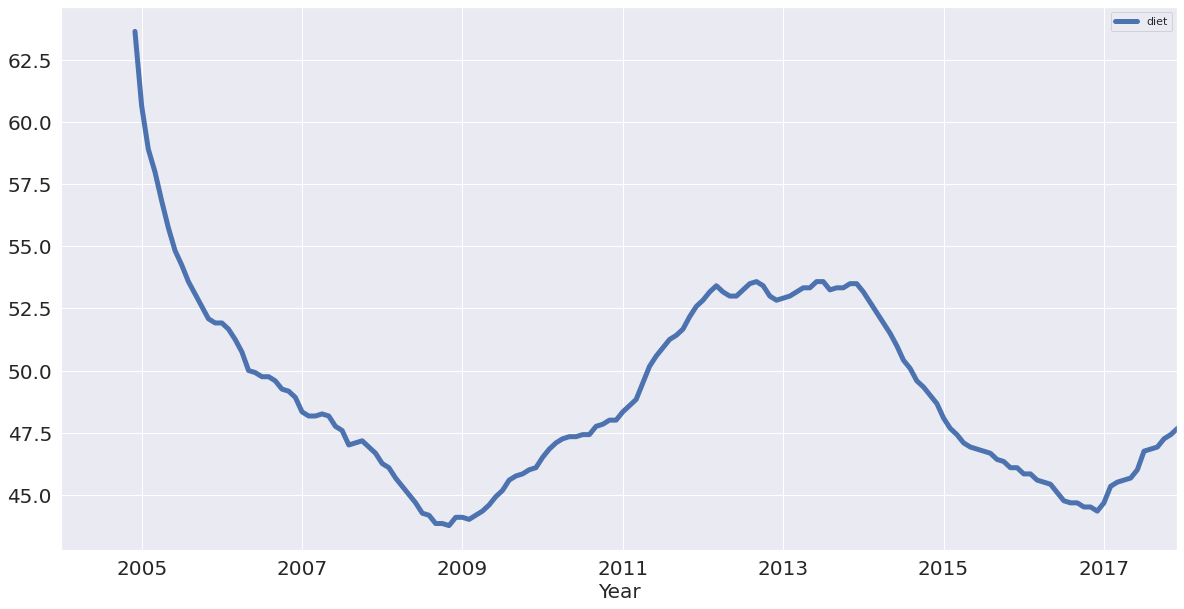

In [9]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);